## Analyzing Covariance Matrices

In [2]:
import sys
import pickle as pkl
import pandas as pd
import numpy as np

In [35]:
import sacc
cluster_profiles = "/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-2026/cluster_profiles.pkl"
data = pkl.load(open(cluster_profiles, "rb"))

## Shear Covariance

tan_bootstrap covariance:


,0,1,2,3,4,5,6
0,1.774113e+24,1.541147e+24,1.183928e+24,6.902395e+23,3.899443e+23,2.553369e+23,2.800024e+23
1,1.541147e+24,1.867583e+24,1.503778e+24,8.873761e+23,6.306060e+23,4.976850e+23,3.327773e+23
2,1.183928e+24,1.503778e+24,1.548387e+24,9.543291e+23,6.197314e+23,4.124447e+23,2.630354e+23
3,6.902395e+23,8.873761e+23,9.543291e+23,9.929201e+23,7.690561e+23,4.889897e+23,3.510891e+23
4,3.899443e+23,6.306060e+23,6.197314e+23,7.690561e+23,9.714344e+23,7.046625e+23,3.356355e+23
5,2.553369e+23,4.976850e+23,4.124447e+23,4.889897e+23,7.046625e+23,9.166503e+23,4.549946e+23
6,2.800024e+23,3.327773e+23,2.630354e+23,3.510891e+23,3.356355e+23,4.549946e+23,6.041705e+23


cross_bootstrap covariance:


,0,1,2,3,4,5,6
0,4.401776e+22,4.569022e+21,-2.907310e+21,-4.017992e+21,-5.040234e+21,-2.926190e+21,-3.857315e+21
1,4.569022e+21,1.834275e+22,3.935768e+21,1.240730e+21,1.476508e+21,8.761353e+20,-8.565844e+19
2,-2.907310e+21,3.935768e+21,1.824943e+22,5.971759e+21,5.981192e+21,2.823142e+21,3.091589e+21
3,-4.017992e+21,1.240730e+21,5.971759e+21,1.609559e+22,8.888468e+21,6.404374e+21,4.599959e+21
4,-5.040234e+21,1.476508e+21,5.981192e+21,8.888468e+21,1.890078e+22,1.018321e+22,6.678720e+21
5,-2.926190e+21,8.761353e+20,2.823142e+21,6.404374e+21,1.018321e+22,1.428486e+22,7.700813e+21
6,-3.857315e+21,-8.565844e+19,3.091589e+21,4.599959e+21,6.678720e+21,7.700813e+21,1.030179e+22


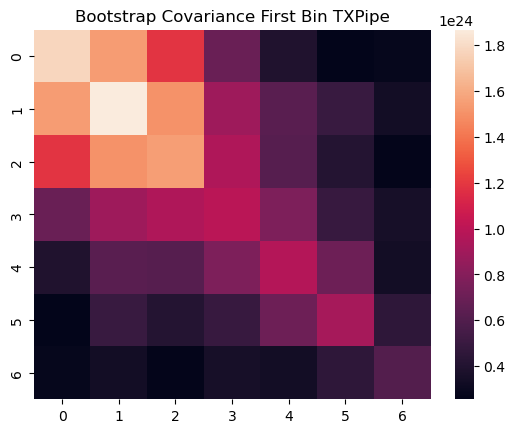

[np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30)]


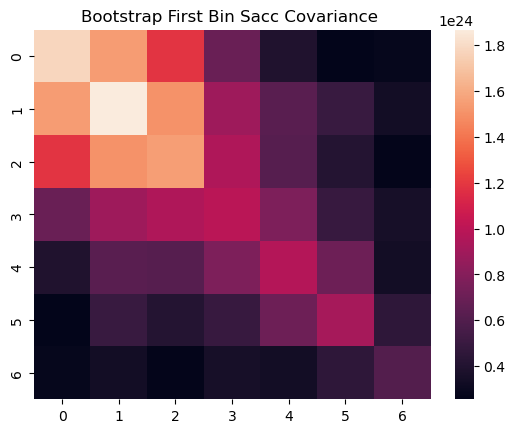

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import sacc
import pandas as pd
cov_data = data["bin_zbin_0_richbin_0"]["clmm_cluster_ensemble"].cov

tan_bs_df = pd.DataFrame(cov_data['tan_bs'])
cross_bs_df = pd.DataFrame(cov_data['cross_bs'])

print("tan_bootstrap covariance:")
display(tan_bs_df)  # Jupyter-friendly table

print("cross_bootstrap covariance:")
display(cross_bs_df)

sns.heatmap(cov_data['tan_bs'], annot=False, fmt=".2e")
plt.title("Bootstrap Covariance First Bin TXPipe")
plt.show()


t = sacc.Sacc.load_fits("/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-2026/cluster_sacc_catalog.sacc")
idx_cov_ds_00 = []
for i in range(0,7):
    trac = ('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_0', f'radius_{i}')
    idx_cov_ds_00.append(t.indices(tracers=trac, data_type=sacc.data_types.standard_types.cluster_delta_sigma)[0])
print(idx_cov_ds_00)
cov_ds = t.covariance.get_block(indices=idx_cov_ds_00)
sns.heatmap(cov_ds, annot=False, fmt=".2e")
plt.title("Bootstrap First Bin Sacc Covariance ")
plt.show()

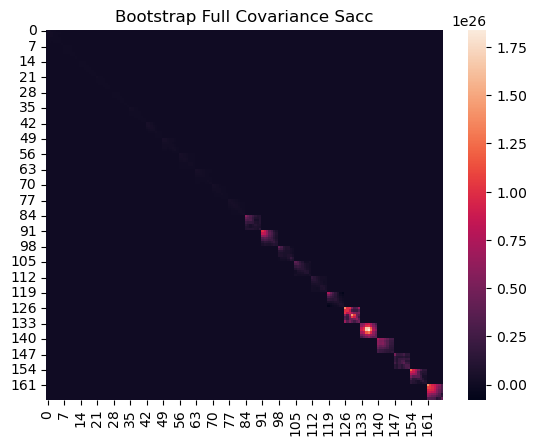

In [37]:
idx_cov_ds = t.indices(data_type=sacc.data_types.standard_types.cluster_delta_sigma)
cov_ds = t.covariance.get_block(indices=idx_cov_ds)
sns.heatmap(cov_ds, annot=False, fmt=".2e")
plt.title("Bootstrap Full Covariance Sacc")
plt.show()


## Cluster Counts Covariance

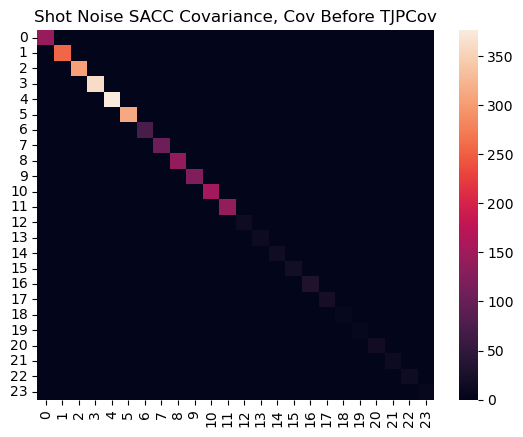

Text(0.5, 1.0, 'SCC SACC Covariance')

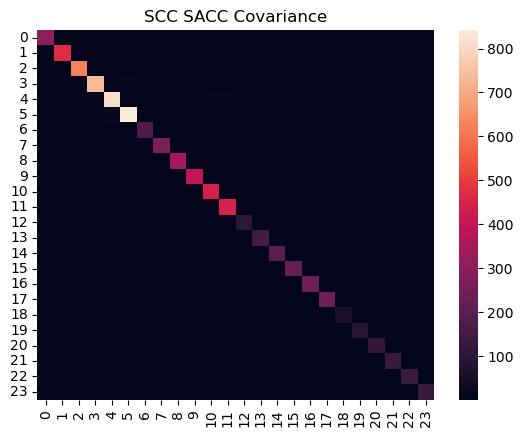

In [40]:
t = sacc.Sacc.load_fits("/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-2026/cluster_sacc_catalog.sacc")
tracer_comb = (("cosmodc2_redmapper","bin_z_1", "bin_rich_0"))
data_type = sacc.standard_types.cluster_counts
idx = t.indices(data_type=data_type)
cov_counts = t.covariance.get_block(idx)
sns.heatmap(cov_counts, annot=False, fmt=".2e", label="Shot Noise")
plt.title("Shot Noise SACC Covariance, Cov Before TJPCov")
plt.show()
t2 = sacc.Sacc.load_fits("/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration/cosmodc2_redmapper_lensing/outputs_mor/clusters_sacc_file_cov.sacc")
tracer_comb2 = (("cosmodc2_redmapper","bin_z_1", "bin_rich_0"))
data_type = sacc.standard_types.cluster_counts
idx = t2.indices(data_type=data_type)
cov_counts2 = t2.covariance.get_block(idx)

sns.heatmap(cov_counts2, annot=False, fmt=".2e", label="SCC")
plt.title("SCC SACC Covariance")
